# Teoría de grafos

A lo largo de este documento se recorrerá .... introducción

In [78]:
%matplotlib inline
#sci py libraries
import numpy as np
import scipy as sp
import scipy.linalg as la
#abstract graphs libraries
import networkx as nx
import random
#ploting and drawing libraries:
from nxpd import draw
import scipy.integrate as sint
import matplotlib.pyplot as plt

## Definición de grafo

Un grafo es un par ordenado $\ G = (V, E) $ Donde:
* $\ V $ es un conjunto de **vertices** o **nodos**.
* $\ E $ es un conjunto de **aristas**, que relacionan estos **nodos**.

Ejemplo de grafo:

$\ G =  \text{ e0(v0,v3) = (v3,v0), e1(v3,v2) = (v2,v3), e2(v0,v1) = (v1,v0), e3(v2,v1) = (v1,v2)} $

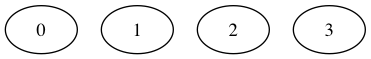

In [41]:
G3 = nx.MultiGraph()
G3.add_nodes_from(range(0,3))
H=nx.Graph()
H.add_path([0,1,2,3])
G3.add_nodes_from(H)
draw(G3, show='ipynb')


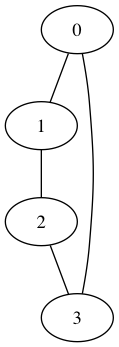

In [39]:
G = np.array([[0,0,0,1],
              [1,0,0,0],
              [0,1,0,1],
              [0,0,1,0]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')

## Grafo dirigido o digrafo

Un grafo es un par ordenado $\ G = (V, E) $ Donde:

* $\ V $ es un conjunto de **vertices** o **nodos**.
* $\ E $ es un conjunto de **pares ordenados** de vertices de $\ V $, a los elementos de $\ E $ que se llaman **arcos**.

Ejemplo de digrafo:

$\ G =  \text{ e0(v0,v3), e1(v3,v2), e2(v0,v1), e3(v2,v1)} $


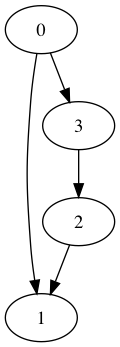

In [48]:
G = nx.DiGraph()
G.add_edges_from([(0,3), (3,2), (0,1), (2,1)])
draw(G, show='ipynb')

## Representación matricial de grafos

Existen diversas formas de representar los grafos, cuando tratamos de reprensetar de forma algoritmica lamás adecuada es la llamada **matriz de adyacencia**.

** definicion:** sea $\ G = (V, E) $  con $\ |V| = n $  y además $\ V = {v_1, v_2, v_3,...v_n} $ la **matriz de adyacencia** de $\ G $ respecto a los vértices anteriores, es una *matriz booleana* $\ n * n $, A, cuyo elemento $\ _i $, $\ _j $ vale $\ 1 $ cuando $\ v_i $ es adyacente a $\ v_j $ y $\ 0 $ cuando no lo es. Es decir, si $\ A = [a_i $ $\ _j] $ es la matriz de adyacencia, entonces:

\begin{equation*}
 a_i,_j = \begin{cases}
    1       & \quad \text{si } {v_i, v_j} \text{ es un lado de G}\\
    0  & \quad \text{en otro caso}\\
  \end{cases}
\end{equation*}


[[[[ Explicación sencilla de lo que es la matri de adyacencia ]]]]

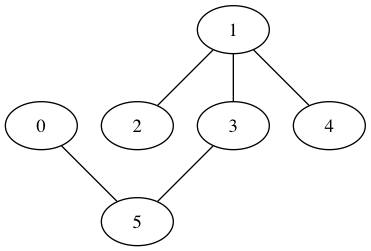

In [51]:
Adj = np.array([[0, 0, 0, 0, 0, 1], 
                [0, 0, 1, 1, 1, 0], 
                [0, 1, 0, 0, 0, 0], 
                [0, 1, 0, 0, 0, 1], 
                [0, 1, 0, 0, 0, 0],
                [1, 0, 0, 1, 0, 0]])

G = nx.from_numpy_matrix(Adj)
draw(G, show='ipynb')

las matrices de adyacencia pueden también emplearse para representar multigrafos con bucles. En tales casos, a matriz A no tiene por qué ser booleana.

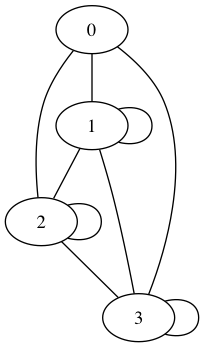

In [55]:
Adj1 = np.array([[0, 3, 1, 2], 
                [3, 1, 1, 1],
                [1, 1, 2, 2],
                [2, 1, 2, 1]
               ])

G1 = nx.from_numpy_matrix(Adj1)

draw(G1, show='ipynb')

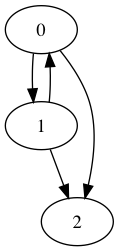

In [58]:
G = nx.DiGraph()
G.add_edges_from([(0,1), (0,2), (1,0), (1,2)])
draw(G, show='ipynb')

## Definiciones complementarias de grafos

### Nudo aislado 

Dentro de un grafo o digrado, un vertice es aislado si no está unido a otros vértices.



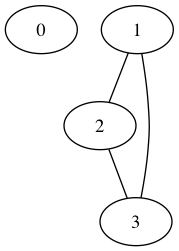

In [64]:
G = np.array([[0,0,0,0],
              [0,0,1,1],
              [0,1,0,1],
              [0,1,1,0]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')

### Bucle

es una arista o arco que une a un vertice consigo mismo. Si el grafo no contiene bucles será considerado **simple**

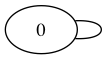

In [67]:
G = np.array([[1]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')


### Multigrafo

Es aquel grafo o digrafo que admite que algunas de sus aristas o arcos sea múltiple 

### Grafo ponderado

Es un grafo o digrafo en el que a cada arista o arco se le asigna un número real posivito, que se denomina peso. El peso total del grafo será la suma de sus aristas.

Este tipo de grafos alcanzan su maximo grado de aplicación en algoritmos como **dijkstra** o **Floyd** usados para encontrar la ruta más proxima entre dos puntos. y usados día a día por todos al usar herramientas de ruta, geoposicionamiento, o en servicios como Maps o Uber

{(1, 3): <matplotlib.text.Text at 0x106082c90>,
 (1, 4): <matplotlib.text.Text at 0x10608e810>,
 (1, 5): <matplotlib.text.Text at 0x106082210>,
 (3, 4): <matplotlib.text.Text at 0x10608e250>,
 (5, 7): <matplotlib.text.Text at 0x10608edd0>}

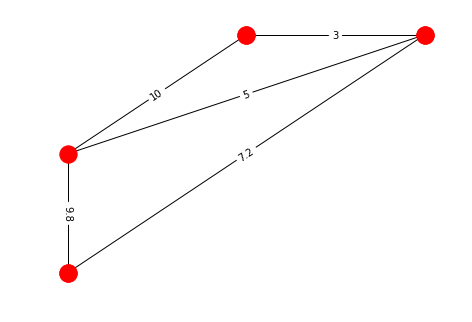

In [94]:
G=nx.Graph()
i=1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_node(4,pos=(3,2))
G.add_node(5,pos=(2,2))
G.add_node(6,pos=(1,0))
G.add_node(7,pos=(3,2))
G.add_edge(1,3,weight=9.8)
G.add_edge(1,4,weight=5)
G.add_edge(3,4,weight=7.2)
G.add_edge(1,5,weight=10)
G.add_edge(5,7,weight=3)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

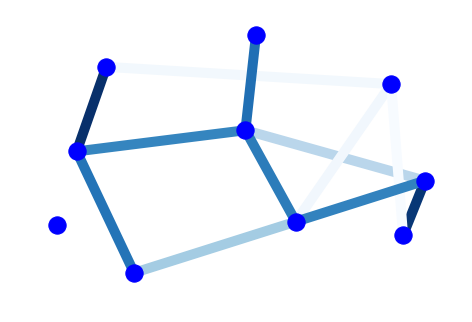

In [95]:
G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)


### Isomorfismo de grafos

Dos grafos simples $\ G1 = (V1, E1) $ y $\ G2 = (V2, E2) $, son isomorfos si existe una función $\ f: V1 -> v2 $ con las condiciónes:

* Es **biyectiva**

* Dos vértices $\ u,v \in V_1 $ son **adyacentes** en $\ G_1 $ si y solo si los vértices $\ f(u) $  y  $\ f(v) $ de $\ v_2 $ son **adyacentes** en $\ G_2 $

Cuando se da esta situación decimos que $\ f $ es un **isomorfismo de grafos** entre $\ G_1 $  y  $\ G_2 $

[[[[[Dibujar el isomorfmismo]]]]

## Grafos con nombre propio

## Referencias

* Félix García Merayo (2015). Matemática discreta 3ª edición.

* Juan De Burgos Román (2012). Números y grafos.

* Documentación de Jupyter. [link](https://jupyter.readthedocs.io/en/latest/)

* Documentación de Ipython. [link](https://ipython.org/)

* Documentación de networkx. [link](https://www.latex-project.org/)

* Documentación de latext. [link](https://www.latex-project.org/)

